## Temat 2

Przewidywanie wzięcia pożyczki. Celem projektu jest zastosowanie modeli klasyfikacji (binarnej) do przewidzenia czy pożyczka zostanie udzielona danemu klientowi z danymi parametrami wniosku.

Link do danych: https://raw.githubusercontent.com/saimadhu-polamuri/DataHakthon3X/master/dataSet/Train.csv

Opis danych (najdokładniejszy jaki istnieje): https://discuss.analyticsvidhya.com/t/hackathon-3-x-predict-customer-worth-for-happy-customer-bank/3802

Zmienna celu (wypłacenie pożyczki): Disbursed

#### Wymogi:

* Zmienna LoggedIn nie może być uwzględniona w modelowaniu - należy ją od razu wyrzucić ze zbioru.
* Nie usuwamy żadnych obserwacji - braki danych uzupełniamy w jakiś sposób.
* Wszelkie nieoczywiste przekształcenia danych należy opatrzyć uzasadnieniem dlaczego dokonujemy tego przekształcenia (np. robimy wykres i uzasadniamy wzięcie logarytmu ze zmiennej tym, że rozkład jest skośny).
* Należy wykorzystać przynajmniej 3 metody klasyfikacji.
* Należy uwzględnić optymalizację modeli/pipelinów.
* Projekt musi być zakończony przejrzystym porównaniem przetestowanych rozwiązań (modeli/pipelinów) w postaci tabeli, gdzie jeden wiersz opisuje jedno rozwiązanie i jego wynik.

#### Opis danych

#### Input variables:

* ID - Unique ID (can not be used for predictions)
* Gender - Sex
* City - Current City
* Monthly_Income - Monthly Income in rupees
* DOB - Date of Birth
* Lead_Creation_Date - Lead Created on date
* Loan_Amount_Applied - Loan Amount Requested (INR)
* Loan_Tenure_Applied - Loan Tenure Requested (in years)
* Existing_EMI - EMI of Existing Loans (INR)
* Employer_Name - Employer Name
* Salary_Account - Salary account with Bank
* Mobile_Verified - Mobile Verified (Y/N)
* Var5 - Continuous classified variable
* Var1 - Categorical variable with multiple levels
* Loan_Amount_Submitted - Loan Amount Revised and Selected after seeing Eligibility
* Loan_Tenure_Submitted - Loan Tenure Revised and Selected after seeing Eligibility (Years)
* Interest_Rate - Interest Rate of Submitted Loan Amount
* Processing_Fee - Processing Fee of Submitted Loan Amount (INR)
* EMI_Loan_Submitted - EMI of Submitted Loan Amount (INR)
* Filled_Form - Filled Application form post quote
* Device_Type - Device from which application was made (Browser/ Mobile)
* Var2 - Categorical Variable with multiple Levels
* Source - Categorical Variable with multiple Levels
* Var4 - Categorical Variable with multiple Levels

#### Outcomes:

* LoggedIn- Application Logged (Variable for understanding the problem – cannot be used in prediction)
* Disbursed- Loan Disbursed (Target Variable)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# data = pd.read_csv('Train.csv')
data = pd.read_csv('Train.csv', encoding='ISO-8859–1')

^ problem z odczytaniem/pobraniem pliku .csv na macOS, stąd dodanie encoding'u.

In [3]:
data.head()

,ID,Gender,City,Monthly_Income,DOB,Lead_Creation_Date,Loan_Amount_Applied,Loan_Tenure_Applied,Existing_EMI,Employer_Name,...,Interest_Rate,Processing_Fee,EMI_Loan_Submitted,Filled_Form,Device_Type,Var2,Source,Var4,LoggedIn,Disbursed
0,ID000002C20,Female,Delhi,20000,23-May-78,15-May-15,300000.0,5.0,0.0,CYBOSOL,...,NaN,NaN,NaN,N,Web-browser,G,S122,1,0,0
1,ID000004E40,Male,Mumbai,35000,07-Oct-85,04-May-15,200000.0,2.0,0.0,TATA CONSULTANCY SERVICES LTD (TCS),...,13.25,NaN,6762.9,N,Web-browser,G,S122,3,0,0
2,ID000007H20,Male,Panchkula,22500,10-Oct-81,19-May-15,600000.0,4.0,0.0,ALCHEMIST HOSPITALS LTD,...,NaN,NaN,NaN,N,Web-browser,B,S143,1,0,0
3,ID000008I30,Male,Saharsa,35000,30-Nov-87,09-May-15,1000000.0,5.0,0.0,BIHAR GOVERNMENT,...,NaN,NaN,NaN,N,Web-browser,B,S143,3,0,0
4,ID000009J40,Male,Bengaluru,100000,17-Feb-84,20-May-15,500000.0,2.0,25000.0,GLOBAL EDGE SOFTWARE,...,NaN,NaN,NaN,N,Web-browser,B,S134,3,1,0


In [4]:
data = data.drop('LoggedIn', axis=1)

^ zgodnie z wymogami wyrzucam ze zbioru zmienną LoggedIn.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     87020 non-null  object 
 1   Gender                 87020 non-null  object 
 2   City                   86017 non-null  object 
 3   Monthly_Income         87020 non-null  int64  
 4   DOB                    87020 non-null  object 
 5   Lead_Creation_Date     87020 non-null  object 
 6   Loan_Amount_Applied    86949 non-null  float64
 7   Loan_Tenure_Applied    86949 non-null  float64
 8   Existing_EMI           86949 non-null  float64
 9   Employer_Name          86949 non-null  object 
 10  Salary_Account         75256 non-null  object 
 11  Mobile_Verified        87020 non-null  object 
 12  Var5                   87020 non-null  int64  
 13  Var1                   87020 non-null  object 
 14  Loan_Amount_Submitted  52407 non-null  float64
 15  Lo

In [6]:
data.shape

(87020, 25)

In [7]:
data['Disbursed'].value_counts()

0    85747
1     1273
Name: Disbursed, dtype: int64

In [8]:
data['Disbursed'].value_counts(normalize=True) 

0    0.985371
1    0.014629
Name: Disbursed, dtype: float64

<AxesSubplot:>

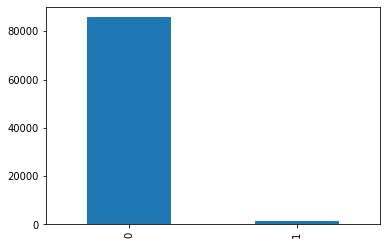

In [9]:
data['Disbursed'].value_counts().plot.bar()

<AxesSubplot:title={'center':'Gender'}>

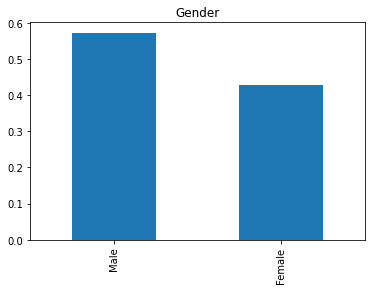

In [10]:
data['Gender'].value_counts(normalize=True).plot.bar(title='Gender')

<AxesSubplot:title={'center':'Var1'}>

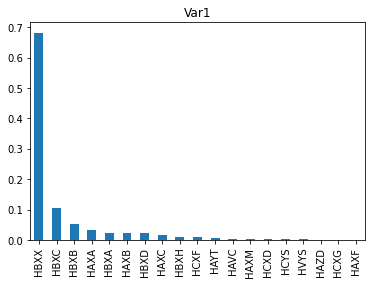

In [11]:
data['Var1'].value_counts(normalize=True).plot.bar(title='Var1')

<AxesSubplot:title={'center':'Var2'}>

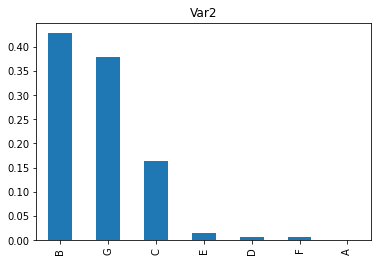

In [12]:
data['Var2'].value_counts(normalize=True).plot.bar(title='Var2')

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Var4', ylabel='Density'>

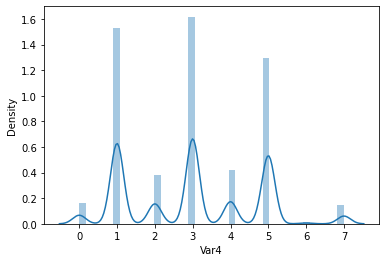

In [13]:
sns.distplot(data['Var4'])

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Var5', ylabel='Density'>

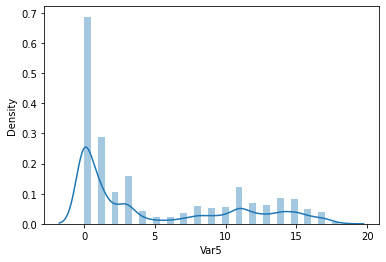

In [14]:
sns.distplot(data['Var5'])

In [15]:
data['Monthly_Income'].min()

0

In [16]:
data['Monthly_Income'].mean()

58849.97435072397

In [17]:
data['Monthly_Income'].max()

444554443

<AxesSubplot:>

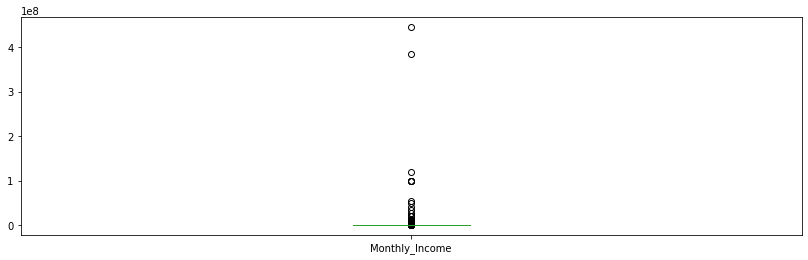

In [18]:
data['Monthly_Income'].plot.box(figsize=(14,4))

<AxesSubplot:title={'center':'Monthly_Income'}, xlabel='Var1'>

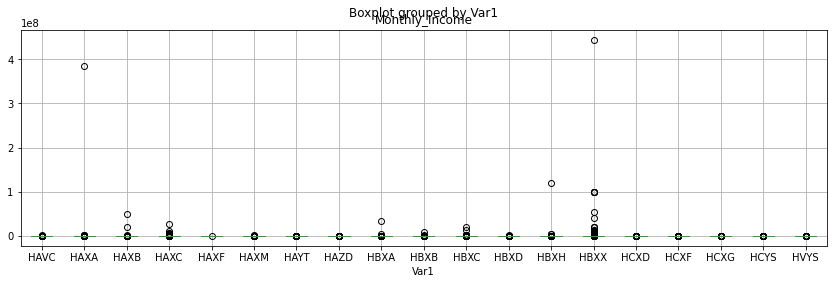

In [19]:
data.boxplot(column='Monthly_Income', by='Var1', figsize=(14,4))

<AxesSubplot:title={'center':'Monthly_Income'}, xlabel='Var2'>

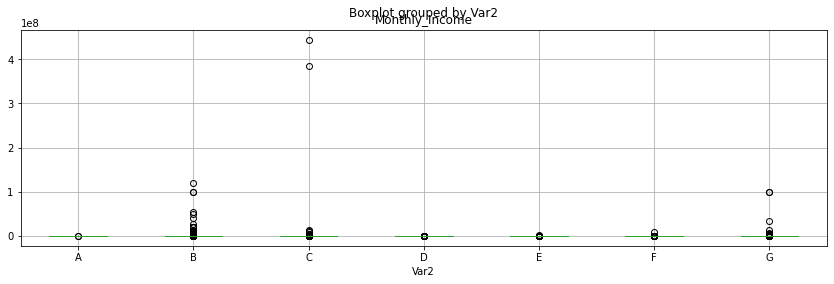

In [20]:
data.boxplot(column='Monthly_Income', by='Var2', figsize=(14,4))

<AxesSubplot:title={'center':'Monthly_Income'}, xlabel='Var4'>

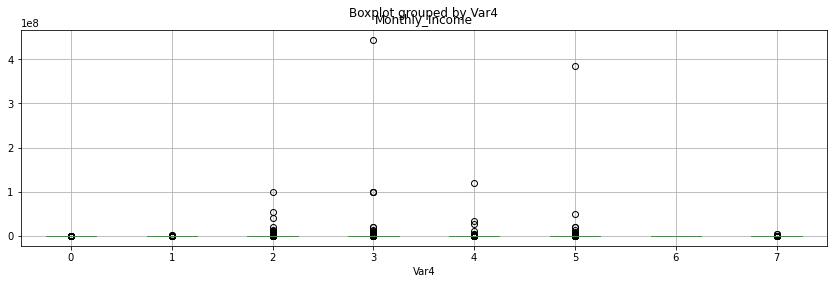

In [21]:
data.boxplot(column='Monthly_Income', by='Var4', figsize=(14,4))

<AxesSubplot:title={'center':'Monthly_Income'}, xlabel='Var5'>

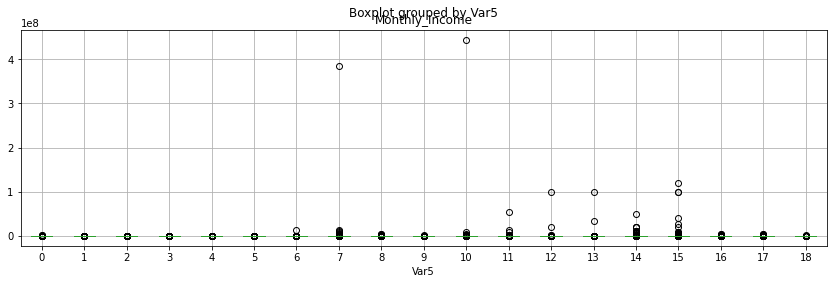

In [22]:
data.boxplot(column='Monthly_Income', by='Var5', figsize=(14,4))

#### Hipotezy:

* Wnioskodawcy o wysokich dochodach powinni mieć większe szanse na otrzymanie kredytu.
* Wnioskodawcy, którzy spłacili swoje poprzednie długi, powinni mieć większe szanse na otrzymanie kredytu.
* Otrzymanie kredytu powinno również zależeć od kwoty kredytu. Jeśli kwota kredytu jest mniejsza, szanse na zatwierdzenie kredytu powinny być większe.
* Im mniejsza kwota miesięcznych spłat kredytu, tym większe szanse na zatwierdzenie kredytu. 

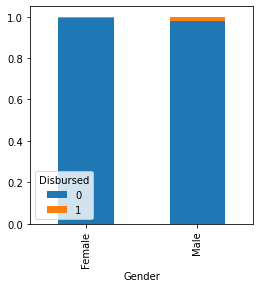

In [23]:
Gender=pd.crosstab(data['Gender'], data['Disbursed'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(4,4))
plt.show()

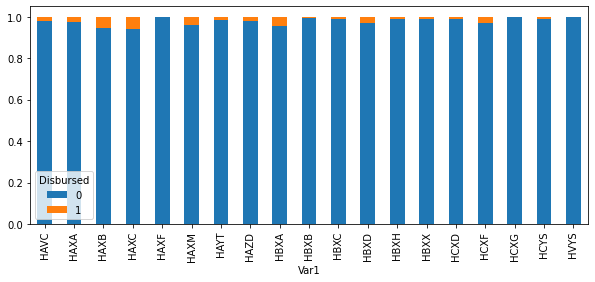

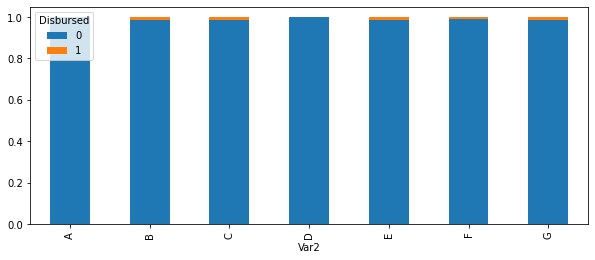

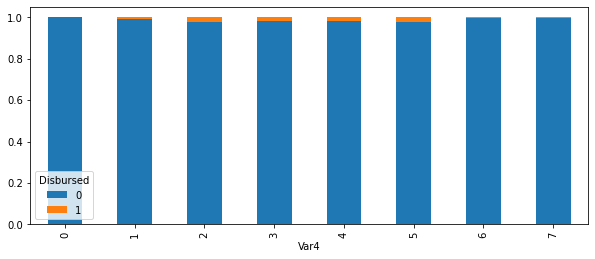

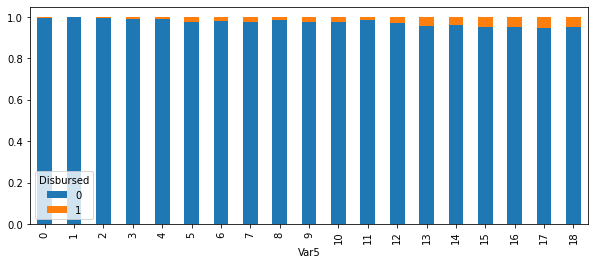

In [24]:
Var1=pd.crosstab(data['Var1'], data['Disbursed'])
Var2=pd.crosstab(data['Var2'], data['Disbursed'])
Var4=pd.crosstab(data['Var4'], data['Disbursed'])
Var5=pd.crosstab(data['Var5'], data['Disbursed'])

Var1.div(Var1.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10,4))
plt.show()
Var2.div(Var2.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10,4))
plt.show()
Var4.div(Var4.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10,4))
plt.show()
Var5.div(Var5.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, figsize=(10,4))
plt.show()

#### Wnioski:

* Gender: Więcej wnioskujących mężczyzn niż kobiet otrzymało kredyt.
* Var1: Istneją cztery warianty, w których osoby wnioskujące nie otrzymały kredytu - HAXF, HBXB, XCXG, HVYS. Można wyróżnić trzy warianty dominujące - XAXB, XAXC, XBXA.
* Var2: Brak udzielonego kredytu w wariantach A oraz D. W pozostałych brak widocznego wpływu na udzielenie kredytu.
* Var4: Udzielono kredytu w czterech z pośród ośmiu wariantów - 2, 3, 4 oraz 5.
* Var5: Warianty 0, 1, 2, 3 - brak udzielonego kredytu. Od wariantu 13 do 18 włącznie istnieje dość podobny poziom udzielonych kredytów.

#### Przychód vs otrzymanie kredytu

In [25]:
data['Monthly_Income'].mean()

58849.97435072397

In [26]:
data['Monthly_Income'].quantile(0.25)

16500.0

In [27]:
data['Monthly_Income'].quantile(0.5)

25000.0

In [28]:
data['Monthly_Income'].quantile(0.75)

40000.0

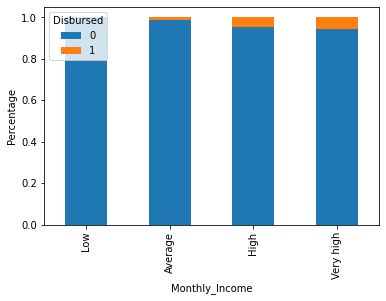

In [29]:
# data.groupby('Disbursed')['Monthly_Income'].mean().plot.bar()

bins=[0, 14712, 58849, 102987, 176549]
group=['Low', 'Average', 'High' ,'Very high']
data['Income_bin']=pd.cut(data['Monthly_Income'], bins, labels=group)
Income_bin=pd.crosstab(data['Income_bin'], data['Disbursed'])
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Monthly_Income')
Percentage=plt.ylabel('Percentage')

#### Wysokość kredytu vs otrzymanie kredytu

In [30]:
data['Loan_Amount_Applied'].mean()

230250.69992754373

In [31]:
data['Loan_Amount_Applied'].quantile(0.25)

0.0

In [32]:
data['Loan_Amount_Applied'].quantile(0.5)

100000.0

In [33]:
data['Loan_Amount_Applied'].quantile(0.75)

300000.0

In [34]:
len(data[data['Loan_Amount_Applied'] == 0])

28853

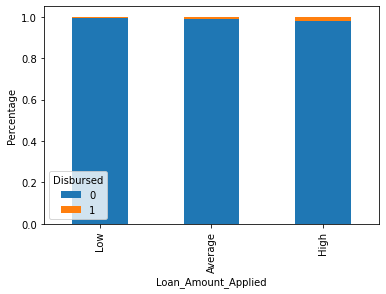

In [35]:
bins=[0, 57562, 230250, 402938]
group=['Low', 'Average', 'High']
data['LoanAmount_bin']=pd.cut(data['Loan_Amount_Applied'], bins, labels=group)
LoanAmount_bin=pd.crosstab(data['LoanAmount_bin'], data['Disbursed'])
LoanAmount_bin.div(LoanAmount_bin.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.xlabel('Loan_Amount_Applied')
Percentage=plt.ylabel('Percentage')

In [36]:
data=data.drop(['Income_bin', 'LoanAmount_bin'], axis=1)

In [37]:
data['Var1'].replace(to_replace=['HBXX', 'HBXC', 'HBXB', 'HAXA', 'HBXA', 'HAXB', 'HBXD', 'HAXC', 'HBXH', 'HCXF', 'HAYT', 'HAVC', 'HAXM', 'HCXD', 'HCYS', 'HVYS', 'HAZD', 'HCXG', 'HAXF'], value=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18], inplace=True)

In [38]:
data['Var2'].replace(to_replace=['A', 'B', 'C', 'D', 'E', 'F', 'G'], value=[0, 1, 2, 3, 4, 5, 6], inplace=True)

<AxesSubplot:>

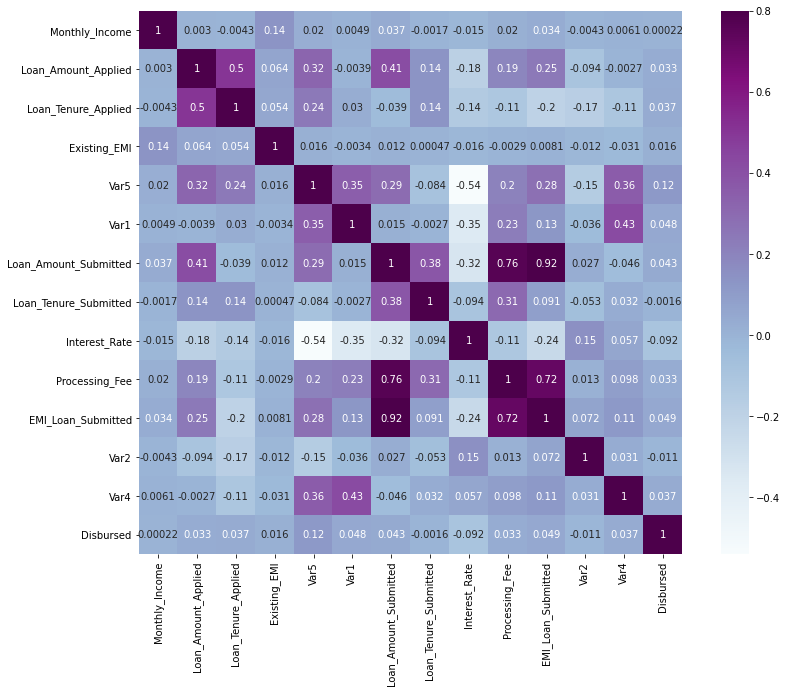

In [39]:
matrix = data.corr()
f, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(matrix, vmax=.8, square=True, cmap='BuPu', annot = True)

#### Uzupełnienie braków w danych

In [40]:
data['City'].fillna(data['City'].mode()[0], inplace=True)
data['Employer_Name'].fillna(data['Employer_Name'].mode()[0], inplace=True)
data['Salary_Account'].fillna(data['Salary_Account'].mode()[0], inplace=True)
data['Loan_Amount_Applied'].fillna(data['Loan_Amount_Applied'].median(), inplace=True)
data['Loan_Tenure_Applied'].fillna(data['Loan_Tenure_Applied'].mean(), inplace=True)
data['Existing_EMI'].fillna(0, inplace=True)

In [41]:
data['Loan_Amount_Submitted_verified'] = np.where((data['Disbursed'] == 1) & (data['Loan_Amount_Submitted'].isnull()), data['Loan_Amount_Applied'], data['Loan_Amount_Submitted'])
data['Loan_Amount_Submitted_verified'] = np.where((data['Disbursed'] == 0) & (data['Loan_Amount_Submitted_verified'].isnull()), 0, data['Loan_Amount_Submitted_verified'])
data = data.drop('Loan_Amount_Submitted', axis=1)

^ zmienną Loan_Amount_Submitted usuwam, ponieważ zastąpiłem ją zmienną Loan_Amount_Submitted_verified, w której uzupełniłem puste wartości. Podobną operację wykonuję także dla zmiennych: Loan_Tenure_Submitted, EMI_Loan_Submitted oraz Interest_Rate.

In [42]:
data['Loan_Tenure_Submitted_verified'] = np.where((data['Disbursed'] == 1) & (data['Loan_Tenure_Submitted'].isnull()), data['Loan_Tenure_Applied'], data['Loan_Tenure_Submitted'])
data['Loan_Tenure_Submitted_verified'] = np.where((data['Disbursed'] == 0) & (data['Loan_Tenure_Submitted_verified'].isnull()), 0, data['Loan_Tenure_Submitted_verified'])
data = data.drop('Loan_Tenure_Submitted', axis=1)

data['EMI_Loan_Submitted_verified'] = np.where((data['Disbursed'] == 1) & (data['EMI_Loan_Submitted'].isnull()), data[data['Disbursed'] == 1]['EMI_Loan_Submitted'].mean(), data['EMI_Loan_Submitted'])
data['EMI_Loan_Submitted_verified'] = np.where((data['Disbursed'] == 0) & (data['EMI_Loan_Submitted_verified'].isnull()), 0, data['EMI_Loan_Submitted_verified'])
data = data.drop('EMI_Loan_Submitted', axis=1)

data['Interest_Rate_verified'] = np.where((data['Disbursed'] == 1) & (data['Interest_Rate'].isnull()), data[data['Disbursed'] == 1]['Interest_Rate'].mean(), data['Interest_Rate'])
data['Interest_Rate_verified'] = np.where((data['Disbursed'] == 0) & (data['Interest_Rate_verified'].isnull()), 0, data['Interest_Rate_verified'])
data = data.drop('Interest_Rate', axis=1)

In [43]:
data['Processing_Fee'].fillna(data['Processing_Fee'].median(), inplace=True)

In [44]:
data.isnull().sum()

ID                                0
Gender                            0
City                              0
Monthly_Income                    0
DOB                               0
Lead_Creation_Date                0
Loan_Amount_Applied               0
Loan_Tenure_Applied               0
Existing_EMI                      0
Employer_Name                     0
Salary_Account                    0
Mobile_Verified                   0
Var5                              0
Var1                              0
Processing_Fee                    0
Filled_Form                       0
Device_Type                       0
Var2                              0
Source                            0
Var4                              0
Disbursed                         0
Loan_Amount_Submitted_verified    0
Loan_Tenure_Submitted_verified    0
EMI_Loan_Submitted_verified       0
Interest_Rate_verified            0
dtype: int64

#### Obserwacje odstające

In [45]:
data[data['Monthly_Income'] == 0]['Disbursed'].value_counts()

0    314
Name: Disbursed, dtype: int64

In [46]:
data = data[data['Monthly_Income'] > 0]

^ Obcinam zbiór danych o 314 rekordów, ponieważ można wywnioskować, że osoba z miesięcznym dochodem równym 0, nie ma szans na otrzymanie kredytu.

<AxesSubplot:>

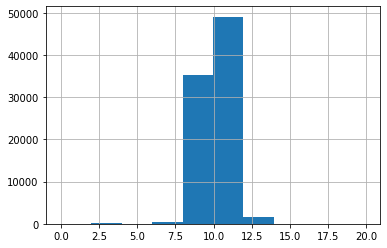

In [47]:
data['Monthly_Income_log']=np.log(data['Monthly_Income'])
data['Monthly_Income_log'].hist()

#### Grupowanie i agregacja danych

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86706 entries, 0 to 87019
Data columns (total 26 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              86706 non-null  object 
 1   Gender                          86706 non-null  object 
 2   City                            86706 non-null  object 
 3   Monthly_Income                  86706 non-null  int64  
 4   DOB                             86706 non-null  object 
 5   Lead_Creation_Date              86706 non-null  object 
 6   Loan_Amount_Applied             86706 non-null  float64
 7   Loan_Tenure_Applied             86706 non-null  float64
 8   Existing_EMI                    86706 non-null  float64
 9   Employer_Name                   86706 non-null  object 
 10  Salary_Account                  86706 non-null  object 
 11  Mobile_Verified                 86706 non-null  object 
 12  Var5                            

In [49]:
aggregated_data = data.groupby(['Disbursed', 'Var1', 'Var2', 'Var4', 'Var5']).describe()
aggregated_data = aggregated_data.reset_index()

In [50]:
# aggregated_data.columns

In [51]:
aggregated_data['Monthly_Income', 'std'].fillna(0, inplace=True)
aggregated_data['Loan_Amount_Applied', 'std'].fillna(0, inplace=True)
aggregated_data['Loan_Tenure_Applied', 'std'].fillna(0, inplace=True)
aggregated_data['Existing_EMI', 'std'].fillna(0, inplace=True)
aggregated_data['Processing_Fee', 'std'].fillna(0, inplace=True)
aggregated_data['Loan_Amount_Submitted_verified', 'std'].fillna(0, inplace=True)
aggregated_data['Loan_Tenure_Submitted_verified', 'std'].fillna(0, inplace=True)
aggregated_data['EMI_Loan_Submitted_verified', 'std'].fillna(0, inplace=True)
aggregated_data['Interest_Rate_verified', 'std'].fillna(0, inplace=True)
aggregated_data['Monthly_Income_log', 'std'].fillna(0, inplace=True)

^ Zamieniam wartości NaN w kolumnach z odchyleniem standardowym (tylko w tych się pojawiły), w celu załadowania danych do modelu.

#### Regresja liniowa

In [52]:
X = aggregated_data.drop('Disbursed', axis=1)
y = aggregated_data['Disbursed']

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/pandas/core/generic.py:3889: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


^ Na potrzeby sklearn usuwam zmienną docelową z zestawu danych, które posłużą jako dane treningowe i zapisuję ją w innym detasecie. 

In [53]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3, random_state=0)

In [54]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(x_train, y_train)
LogisticRegression()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

^ Dzielę zbiór danych na część treningową oraz walidacyjną. Importuję LogisticRegression i accuracy_score ze sklearn w celu dopasowania modelu.

In [55]:
pred_cv = model.predict(x_cv)
accuracy_score(y_cv,pred_cv)

0.8143607705779334

^ Przewidywania są w około 80% trafne, czyli decyzja o przyznaniu kredytu została określona poprawnie w około 80% przypadków.

#### Drzewo decyzyjne

In [56]:
from sklearn.tree import DecisionTreeClassifier
from six import StringIO
from sklearn.tree import export_graphviz
from pydot import graph_from_dot_data
from IPython.display import Image

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=0)

In [58]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

^ Tworzę i trenuję instancję klasy DecisionTreeClassifer. Podaję wartości y, ponieważ model wykorzystuje algorytm nadzorowany.

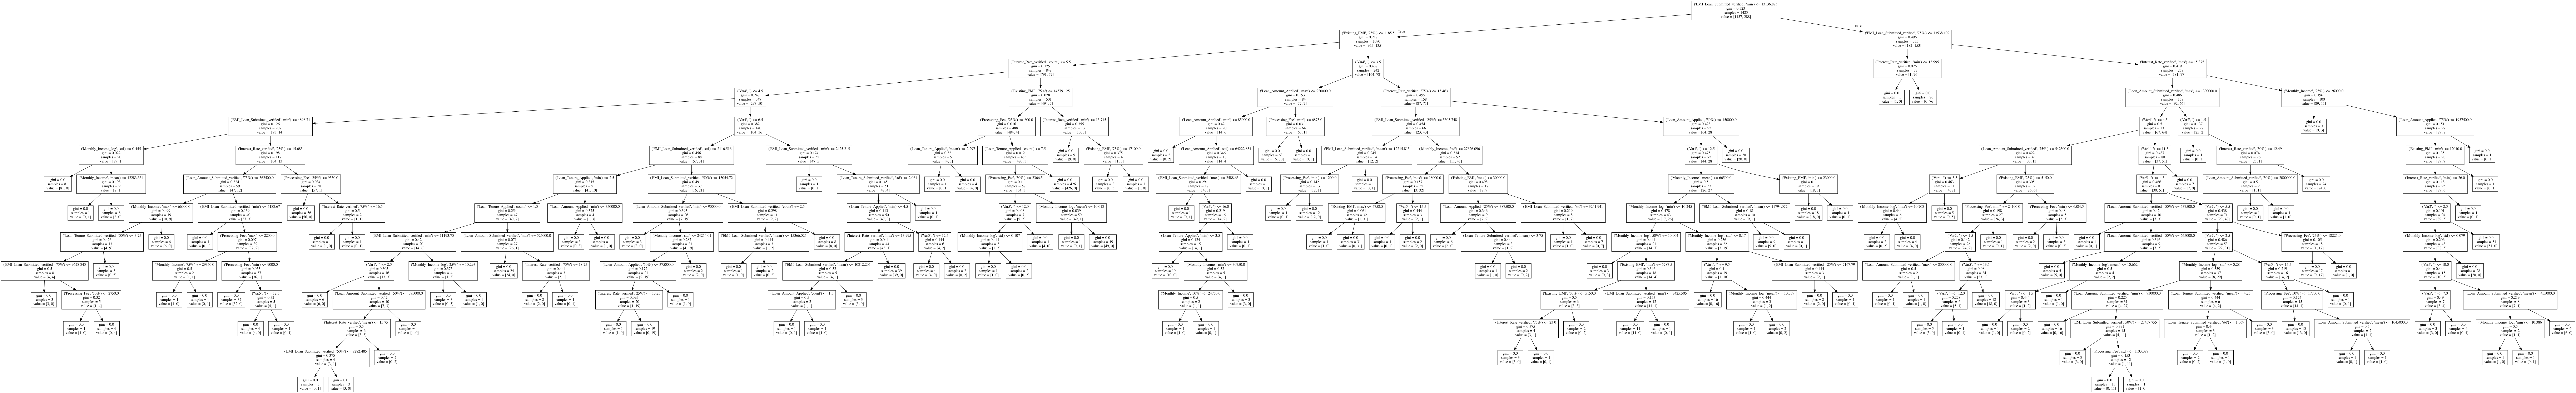

In [59]:
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, feature_names=X.columns)

(graph, ) = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [60]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [61]:
# decision = np.array(y_test).argmax(axis=1)
# predictions = np.array(y_pred).argmax(axis=1)
# confusion_matrix(decision, predictions)

AxisError: axis 1 is out of bounds for array of dimension 1

#### K-NN

In [62]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [63]:
knn = KNeighborsClassifier(n_neighbors=7)

In [64]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [65]:
print(knn.score(X_test, y_test))

0.7611548556430446


^ Sprawdzenie poprawności na zbiorze danych, którego model wcześniej nie widział.

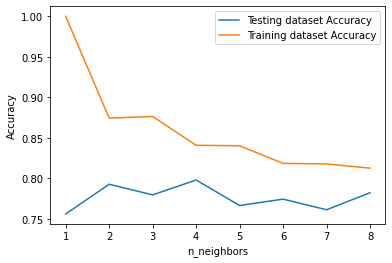

In [66]:
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    
    train_accuracy[i] = knn.score(X_train, y_train)
    test_accuracy[i] = knn.score(X_test, y_test)

# Wykres
plt.plot(neighbors, test_accuracy, label = 'Testing dataset Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training dataset Accuracy')

plt.legend()
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()